Lattice vibrations
---

This notebook is an animation of the Y2 Atomic Physics problem sheet 3, question 1 (the APS).

Throughout
- Spatial scales are normalised to the particle spacing ($a$), so wavenumbers $k = 2\pi / \lambda$ are normalised to $1/a$.
- Time scales are normalised to $1 / \Omega$, so frequencies are normalised to $\Omega$

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

Define and plot the dispersion relation
---

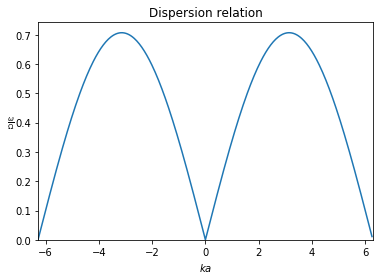

In [12]:
def omega(k):
    return (1 / np.sqrt(2)) * np.abs(np.sin(k / 2))

fig, ax = plt.subplots()
k = np.arange(-2 * np.pi, 2 * np.pi, np.pi / 100)
ax.plot(k, omega(k))
ax.set_xlim(-2 * np.pi, 2 * np.pi)
ax.set_ylim(bottom=0)
ax.set_xlabel(r'$ka$')
ax.set_ylabel(r'$\frac{\omega}{\Omega}$', rotation=0)
ax.set_title('Dispersion relation');

Define displacement as a function of time and particle number
---

In [42]:
def u(k, n, w, t):
    return 0.25 * np.cos(k * n - w * t)

Define displacement functions for the two wavevectors
---

The two wavevectors we are interested in are $k^{+} =\frac{\pi}{2}$ and $k^{-} =\frac{\pi}{2}$, so define displacement for each of these two wavevectors

In [43]:
def u_plus(n, t):
    k = np.pi / 2
    return u(k, n, omega(k), t)
def u_minus(n, t):
    k = -np.pi / 2
    return u(k, n, omega(k), t)

Plot animated chains
---

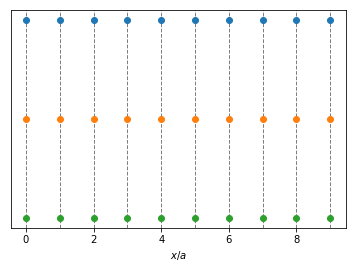

In [61]:
fig, ax = plt.subplots()
ax.set_xlabel(r'$x / a$')
ax.yaxis.set_visible(False)

n = np.arange(0, 10, 1)
equillibria = n
lines = []
y = np.ones(*n.shape) + 1
for x in equillibria:
    ax.axvline(x, color='k', lw=1, linestyle='--', alpha=0.5)
    
line_plus, = ax.plot(equillibria, y, marker='o', lw=0)
line_minus, = ax.plot(equillibria, y - 1, marker='o', lw=0)
line_comb, = ax.plot(equillibria, y - 2, marker='o', lw=0)

In [62]:
def init():  # only required for blitting to give a clean slate.
    line_plus.set_xdata([np.nan] * len(equillibria))
    line_minus.set_xdata([np.nan] * len(equillibria))
    line_comb.set_xdata([np.nan] * len(equillibria))
    return line_plus, line_minus, line_comb


def animate(t):
    line_plus.set_xdata(equillibria + u_plus(n, t))
    line_minus.set_xdata(equillibria + u_minus(n, t))
    line_comb.set_xdata(equillibria + u_minus(n, t) + u_plus(n, t))
    return line_plus, line_minus, line_comb


ani = animation.FuncAnimation(
    fig, animate, init_func=init, blit=True, frames=np.linspace(0, 4 * np.pi, 100), interval=20)

HTML(ani.to_html5_video())